In [1]:
# Imports and Setup

import numpy as np
import pandas as pd
import scipy as sp
from scipy.ndimage.filters import gaussian_filter1d as smooth

%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = 14, 10
plt.rcParams['lines.linewidth'] = 1.5

font = {'weight' : 'normal',
      'size'   : 15}

plt.rc('font', **font)

from forward_multiple_GHG import fair_scm as FAIR_model
from fair_inverse_revised import temp_to_forcing
from fair_inverse_revised import forcing_to_conc
from fair_inverse_revised import conc_to_emissions

In [2]:
#import RCP3PD emissions and associated radiative forcing

datafile = 'RCP3PD'

emms_file = './RCPs/' + datafile + '_EMISSIONS.csv'
emms_data = np.genfromtxt(emms_file,skip_header=36,delimiter=',',names=True)

emissions = emms_data['FossilCO2'] + emms_data['OtherCO2']
M_emissions = emms_data['CH4']
N_emissions = emms_data['N2O'] * 44.0 / 28.0

forc_file = './RCPs/'+datafile+'_MIDYEAR_RADFORCING.csv'
forc_data = np.genfromtxt(forc_file,skip_header=58,delimiter=',',names=True)
other_rf = forc_data['TOTAL_ANTHRO_RF'] - forc_data['CO2_RF'] - forc_data['CH4_RF'] - forc_data['N2O_RF']

In [3]:
#run model, FAIR STANDARD PARAMETERS

out_co2_RCP3 = FAIR_model(emissions = emissions, MAGICC_model = True)
temp_co2_RCP3 = out_co2_RCP3['temperature']
forc_co2_RCP3 = out_co2_RCP3['forcing']['total']
conc_co2_RCP3 = forcing_to_conc(forc_co2_RCP3)
ems_co2_RCP3, smoothed_ems_co2_RCP2 = conc_to_emissions(conc_co2_RCP3, temp_co2_RCP3)

out_co2_infered = FAIR_model(emissions = ems_co2_RCP3, MAGICC_model = True)
temp_co2_infered = out_co2_infered['temperature']

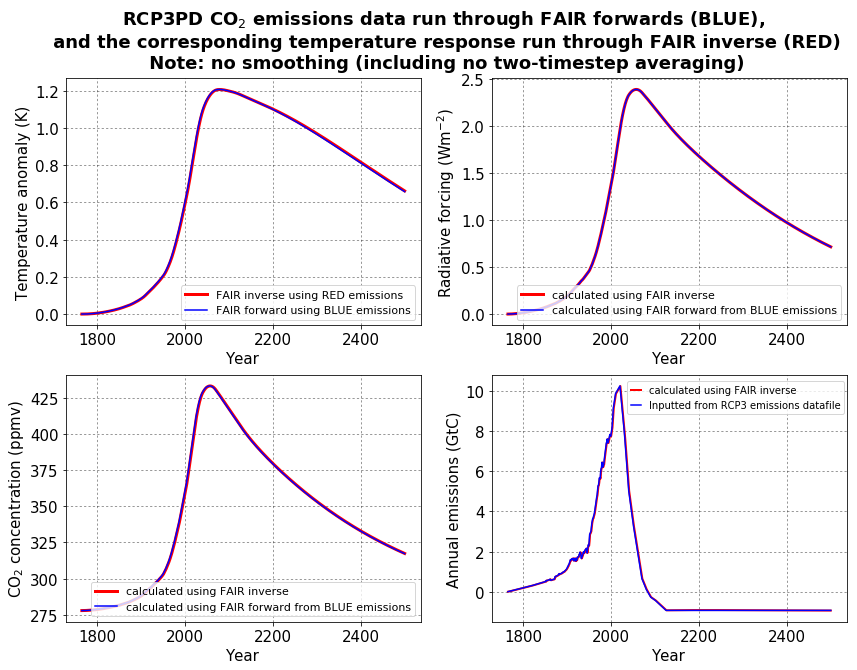

In [4]:
time = np.arange(1765,2501)

fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.plot(time, temp_co2_infered, color = 'red', linewidth = 3, label = 'FAIR inverse using RED emissions')
ax1.plot(time, temp_co2_RCP3, color = 'blue', label = 'FAIR forward using BLUE emissions')
ax1.set_xlabel('Year')
ax1.set_ylabel('Temperature anomaly (K)')
ax1.legend(loc = 'lower right', fontsize = 11)
ax1.grid(True, linestyle = ':', color = 'black', alpha = 0.5)

ax2.plot(time, forc_co2_RCP3, color = 'red', linewidth = 3, label = 'calculated using FAIR inverse')
ax2.plot(time, out_co2_RCP3['forcing']['total'], color = 'blue', label = 'calculated using FAIR forward from BLUE emissions')
ax2.set_xlabel('Year')
ax2.set_ylabel('Radiative forcing (Wm$^{-2}$)')
ax2.legend(loc = 'lower right', fontsize = 11)
ax2.grid(True, linestyle = ':', color = 'black', alpha = 0.5)

ax3.plot(time, conc_co2_RCP3, color = 'red', linewidth = 3, label = 'calculated using FAIR inverse')
ax3.plot(time, out_co2_RCP3['concentration']['CO2'], color = 'blue', label = 'calculated using FAIR forward from BLUE emissions')
ax3.legend(loc = 'lower right', fontsize = 11)
ax3.set_xlabel('Year')
ax3.set_ylabel('CO$_2$ concentration (ppmv)')
ax3.grid(True, linestyle = ':', color = 'black', alpha = 0.5)

ax4.plot(time, ems_co2_RCP3, color = 'red', linewidth = 2, label = 'calculated using FAIR inverse')
ax4.plot(time, emissions, color = 'blue', label = 'Inputted from RCP3 emissions datafile')
ax4.legend(loc = (0.38,0.84), handlelength=1, fontsize = 10, framealpha = 0.8)
ax4.set_xlabel('Year')
ax4.set_ylabel('Annual emissions (GtC)')
ax4.grid(True, linestyle = ':', color = 'black', alpha = 0.5)

fig.suptitle('RCP3PD CO$_2$ emissions data run through FAIR forwards (BLUE),\n and the corresponding temperature response run through FAIR inverse (RED)\n Note: no smoothing (including no two-timestep averaging)', fontweight = 'bold')

#fig.savefig('fair_inverse_revised')

(1900, 2100)

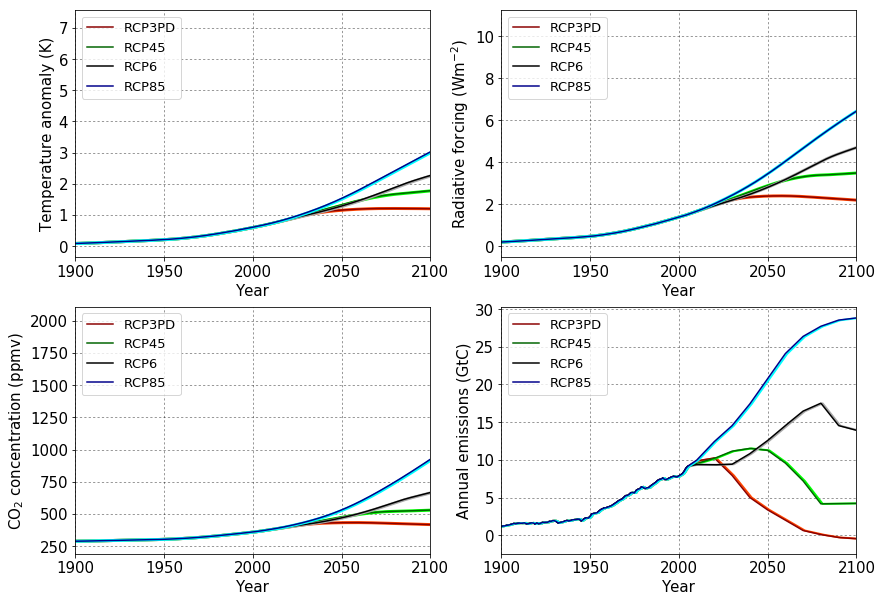

In [5]:
datafiles = ['RCP3PD', 'RCP45', 'RCP6', 'RCP85']
colours1 = ['orangered','lime','darkgrey','cyan']
colours2 = ['darkred','darkgreen','black','darkblue']

time = np.arange(1765,2501)

fig = plt.figure()
ax1 = fig.add_subplot(221)
ax1.set_xlabel('Year')
ax1.set_ylabel('Temperature anomaly (K)')
ax1.grid(True, linestyle = ':', color = 'black', alpha = 0.5)
ax2 = fig.add_subplot(222)
ax2.set_xlabel('Year')
ax2.set_ylabel('Radiative forcing (Wm$^{-2}$)')
ax2.grid(True, linestyle = ':', color = 'black', alpha = 0.5)
ax3 = fig.add_subplot(223)
ax3.set_xlabel('Year')
ax3.set_ylabel('CO$_2$ concentration (ppmv)')
ax3.grid(True, linestyle = ':', color = 'black', alpha = 0.5)
ax4 = fig.add_subplot(224)
ax4.set_xlabel('Year')
ax4.set_ylabel('Annual emissions (GtC)')
ax4.grid(True, linestyle = ':', color = 'black', alpha = 0.5)

for i,datafile in enumerate(datafiles):
    emms_file = './RCPs/' + datafile + '_EMISSIONS.csv'
    emms_data = np.genfromtxt(emms_file,skip_header=36,delimiter=',',names=True)
    
    emissions = emms_data['FossilCO2'] + emms_data['OtherCO2']
    M_emissions = emms_data['CH4']
    N_emissions = emms_data['N2O'] * 44.0 / 28.0
    
    forc_file = './RCPs/'+datafile+'_MIDYEAR_RADFORCING.csv'
    forc_data = np.genfromtxt(forc_file,skip_header=58,delimiter=',',names=True)
    other_rf = forc_data['TOTAL_ANTHRO_RF'] - forc_data['CO2_RF'] - forc_data['CH4_RF'] - forc_data['N2O_RF']
    
    out_co2_RCP = FAIR_model(emissions = emissions, MAGICC_model = True)
    temp_co2_RCP = out_co2_RCP['temperature']
    forc_co2_RCP = out_co2_RCP['forcing']['total']
    conc_co2_RCP = forcing_to_conc(forc_co2_RCP)
    ems_co2_RCP, smoothed_ems_co2_RCP = conc_to_emissions(conc_co2_RCP, temp_co2_RCP)
    
    out_co2_infered = FAIR_model(emissions = ems_co2_RCP, MAGICC_model = True)
    temp_co2_infered = out_co2_infered['temperature']
    
    ax1.plot(time, temp_co2_infered, color = colours1[i], linewidth = 3)
    ax1.plot(time, temp_co2_RCP, color = colours2[i], label = datafile)
    
    ax2.plot(time, forc_co2_RCP, color = colours1[i], linewidth = 3)
    ax2.plot(time, out_co2_RCP['forcing']['total'], color = colours2[i], label = datafile)
    
    ax3.plot(time, conc_co2_RCP, color = colours1[i], linewidth = 3)
    ax3.plot(time, out_co2_RCP['concentration']['CO2'], color = colours2[i], label = datafile)
    
    ax4.plot(time, ems_co2_RCP, color = colours1[i], linewidth = 2)
    ax4.plot(time, emissions, color = colours2[i], label = datafile)
    
ax1.legend(loc = 'upper left', fontsize = 13)
ax2.legend(loc = 'upper left', fontsize = 13)
ax3.legend(loc = 'upper left', fontsize = 13)
ax4.legend(loc = 'upper left', fontsize = 13)

ax1.set_xlim(1900,2100)
ax2.set_xlim(1900,2100)
ax3.set_xlim(1900,2100)
ax4.set_xlim(1900,2100)

#fig.savefig('all-four-rcp-inverse-fair-test')

In [6]:
#import piers data for total anthro RF

rf_anthro_piers = np.loadtxt("rf_a_reord.txt")
rf_anthro_piers = rf_anthro_piers.reshape((200,267))

#import median data anthro forcing from richard
rf_comps_median = np.loadtxt("Annualforcings_Mar2014_GHGrevised.txt", skiprows=4)

#sum components of file to make total...
rf_anthro_median = rf_comps_median[:,1] + rf_comps_median[:,2] + rf_comps_median[:,3] + rf_comps_median[:,4] +  rf_comps_median[:,6] + rf_comps_median[:,7] + rf_comps_median[:,8] + rf_comps_median[:,9] + rf_comps_median[:,10]  
rf_other_median = rf_comps_median[:,13] - rf_comps_median[:,14]
rf_total_median = rf_comps_median[:,13]

y_0 = int(rf_comps_median[0,0])
time = rf_comps_median[:,0] 

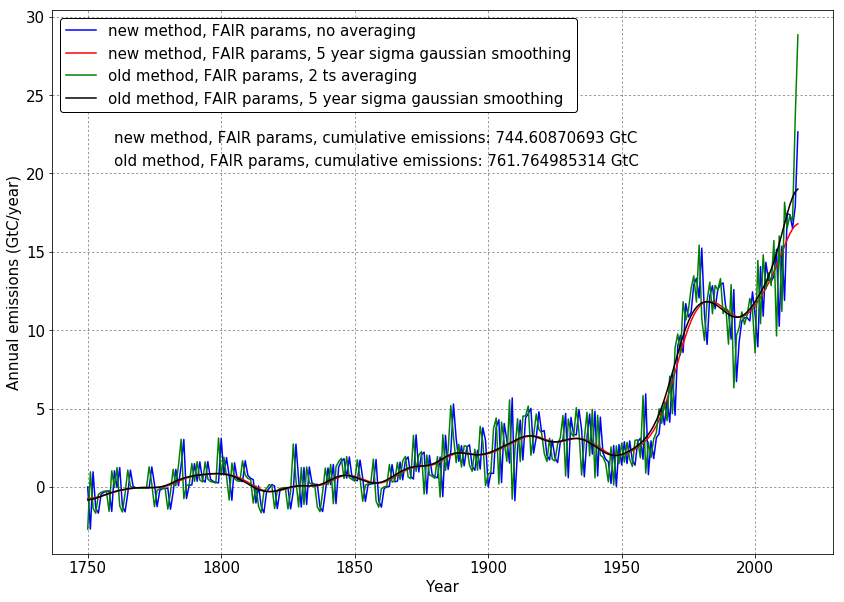

In [7]:
#Comparing new to old method - FAIR STANDARD PARAMS
#using total temperature response, and anthropogenic forcing


from fair_inverse_model import co2_conc_total as rf_to_conc2
from fair_inverse_model import annual_emissions_calc2 as conc_to_emissions2

#new method
out_total = FAIR_model(other_rf = rf_total_median, MAGICC_model = True)
temp_total = out_total['temperature']
conc_total = forcing_to_conc(rf_total_median, RF_ext = rf_other_median, RF_ext_in = True)
ems_total, ems_total_smooth = conc_to_emissions(conc_total, temp_total)

#old method
out_anthro_historical = FAIR_model(other_rf=rf_total_median,MAGICC_model = True)
temp_anthro_historical = out_anthro_historical['temperature']
co2_conc_anthro_historical = rf_to_conc2(rf_total_median, RF_ext = rf_other_median, RF_ext_in = True)
anthro_historical_co2_fe_ems = conc_to_emissions2(co2_conc_anthro_historical,temp_anthro_historical, year_smoothing = 0)
two_ts_removed_anthro = np.zeros(anthro_historical_co2_fe_ems.size)
two_ts_removed_anthro[anthro_historical_co2_fe_ems.size-1] = anthro_historical_co2_fe_ems[anthro_historical_co2_fe_ems.size-1]/5
for i in range(0, anthro_historical_co2_fe_ems.size-1):
    two_ts_removed_anthro[i] = (anthro_historical_co2_fe_ems[i+1] + anthro_historical_co2_fe_ems[i])/2 

cum_anthro = np.cumsum(ems_total_smooth[1870-1750:])
cum_anthro2 = np.cumsum(smooth(two_ts_removed_anthro,5)[1870-1750:])
    
plt.plot(time, ems_total, color = 'blue', label = 'new method, FAIR params, no averaging')
plt.plot(time, ems_total_smooth, color = 'red', label = 'new method, FAIR params, 5 year sigma gaussian smoothing')
plt.plot(time, two_ts_removed_anthro, color = 'green', label = 'old method, FAIR params, 2 ts averaging')
plt.plot(time, smooth(two_ts_removed_anthro,5), color = 'black', label = 'old method, FAIR params, 5 year sigma gaussian smoothing')
plt.grid(True, linestyle = ':', color = 'black', alpha = 0.5)
plt.xlabel('Year')
plt.ylabel('Annual emissions (GtC/year)')
plt.legend(loc = 'best', framealpha = 1, edgecolor = 'black')
plt.text(1760,22, 'new method, FAIR params, cumulative emissions: %s GtC' %cum_anthro[2011-1870])
plt.text(1760,20.5, 'old method, FAIR params, cumulative emissions: %s GtC' %cum_anthro2[2011-1870])

